#1)  Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:
gas=pd.read_csv('/content/gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
gas['TET_Energy']=gas['TEY']
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,TET_Energy
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,110.74


In [ ]:
gas.drop('TEY',axis=1,inplace=True)
gas.reset_index(drop=True,inplace=True)


In [ ]:
gas.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [ ]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TET_Energy


In [ ]:
gas.isnull()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TET_Energy
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15034,False,False,False,False,False,False,False,False,False,False,False
15035,False,False,False,False,False,False,False,False,False,False,False
15036,False,False,False,False,False,False,False,False,False,False,False
15037,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
gas.isnull().sum()

AT            0
AP            0
AH            0
AFDP          0
GTEP          0
TIT           0
TAT           0
CDP           0
CO            0
NOX           0
TET_Energy    0
dtype: int64

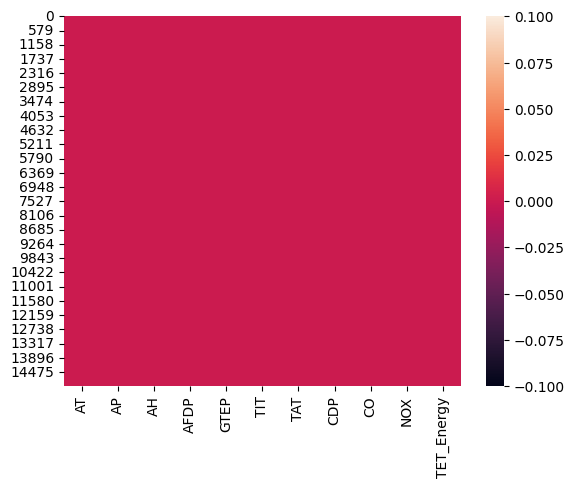

In [ ]:
sns.heatmap(gas.isnull())
plt.show()

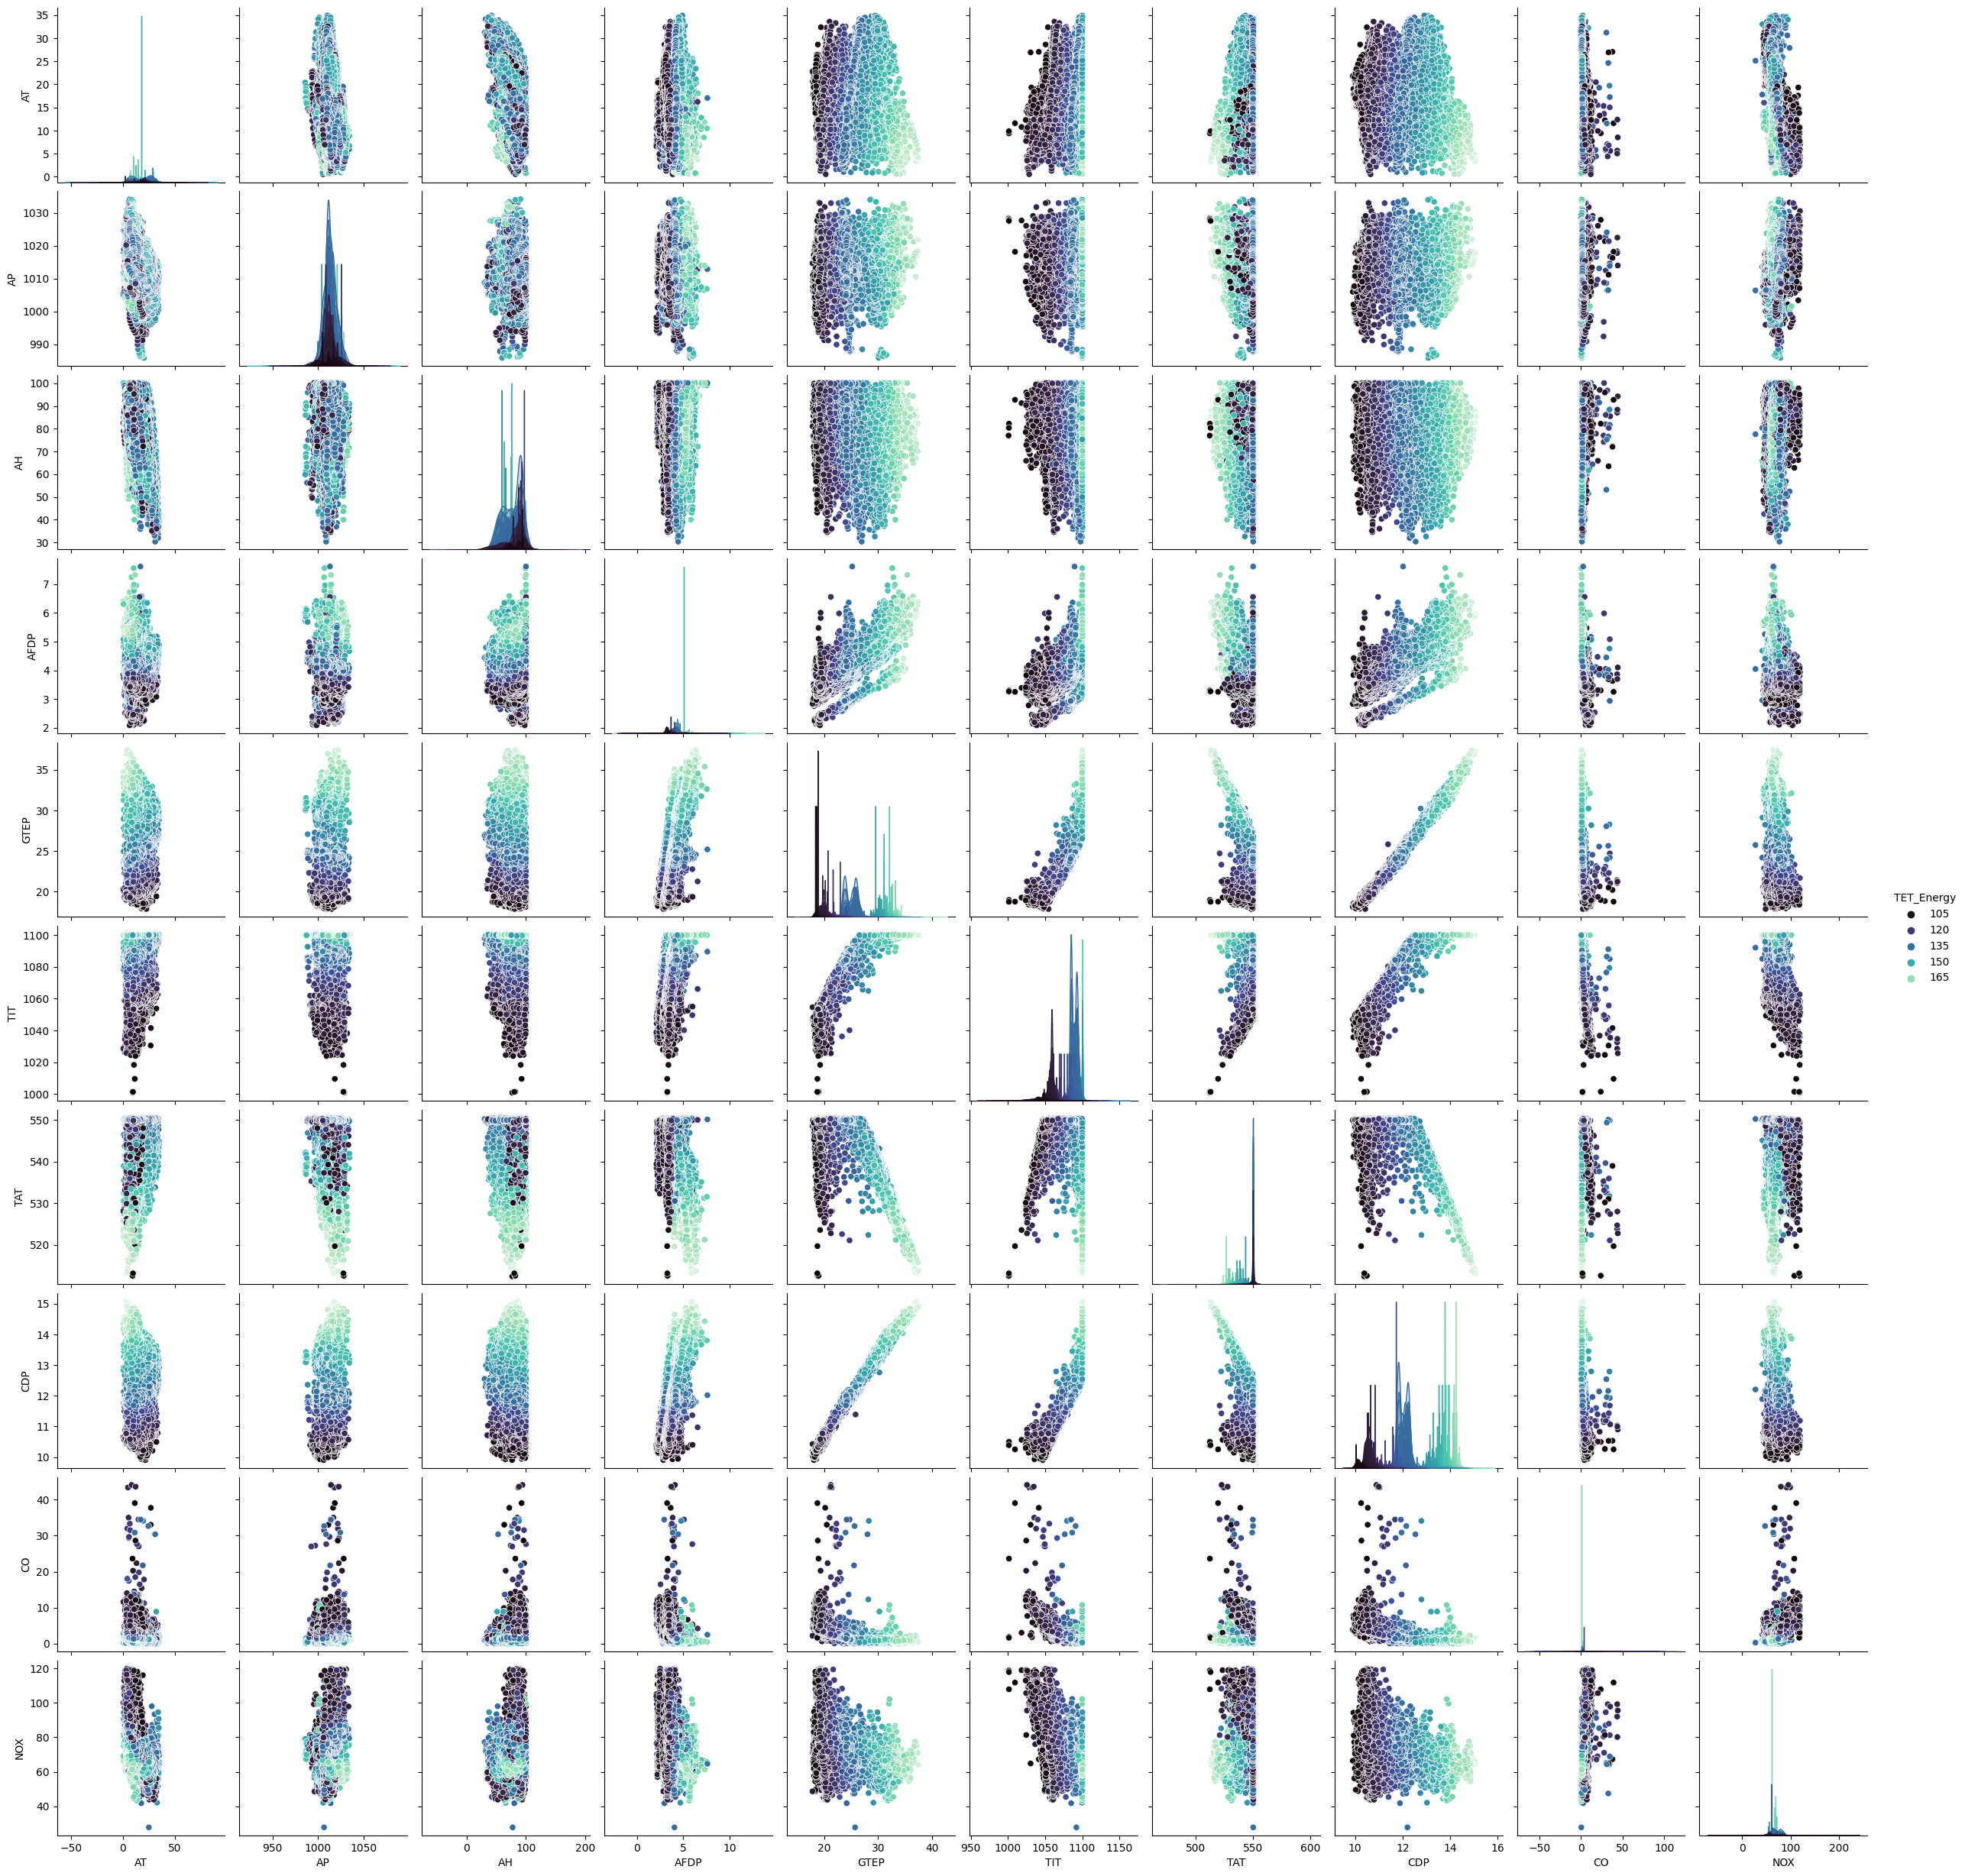

In [ ]:
sns.pairplot(gas,palette='mako',hue='TET_Energy')
plt.show()

In [ ]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TET_Energy
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


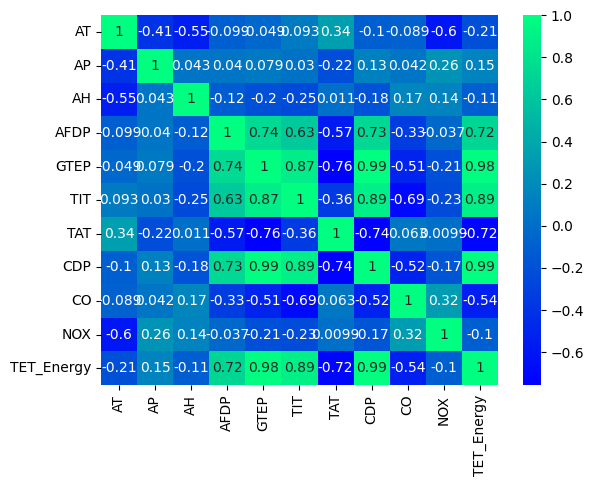

In [ ]:
sns.heatmap(gas.corr(),cmap='winter',annot=True)
plt.show()

In [ ]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TET_Energy
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934,134.188464
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586,15.829717
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000,100.170000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500,127.985000
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000,133.780000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500,140.895000
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000,174.610000


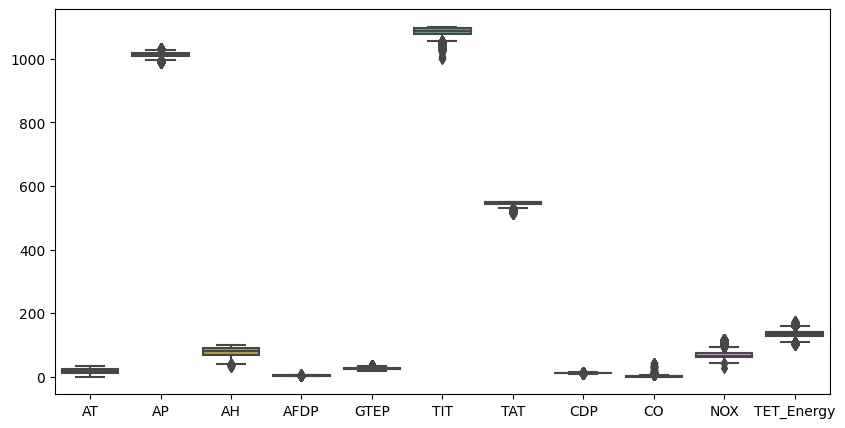

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=gas)
plt.show()

Sepration of Data

In [ ]:
X=gas.iloc[:,:10]
y=gas.iloc[:,10]

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.utils import custom_object_scope

In [ ]:
model=Sequential()
model.add(Dense(15,input_dim=10,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae','mse'])

In [ ]:
history=model.fit(X,y,validation_split=0.2,batch_size=250,epochs=500)

Epoch 1/500
49/49 [==============================] - 1s 8ms/step - loss: 18170.3340 - mae: 133.8714 - mse: 18170.3340 - val_loss: 17267.3691 - val_mae: 130.4570 - val_mse: 17267.3691
Epoch 2/500
49/49 [==============================] - 0s 4ms/step - loss: 18170.3359 - mae: 133.8714 - mse: 18170.3359 - val_loss: 17267.3691 - val_mae: 130.4570 - val_mse: 17267.3691
Epoch 3/500
49/49 [==============================] - 0s 3ms/step - loss: 18170.3340 - mae: 133.8714 - mse: 18170.3340 - val_loss: 17267.3691 - val_mae: 130.4570 - val_mse: 17267.3691
Epoch 4/500
49/49 [==============================] - 0s 4ms/step - loss: 18170.3379 - mae: 133.8714 - mse: 18170.3379 - val_loss: 17267.3691 - val_mae: 130.4570 - val_mse: 17267.3691
Epoch 5/500
49/49 [==============================] - 0s 4ms/step - loss: 18170.3379 - mae: 133.8714 - mse: 18170.3379 - val_loss: 17267.3691 - val_mae: 130.4570 - val_mse: 17267.3691
Epoch 6/500
49/49 [==============================] - 0s 4ms/step - loss: 18170.3340 -

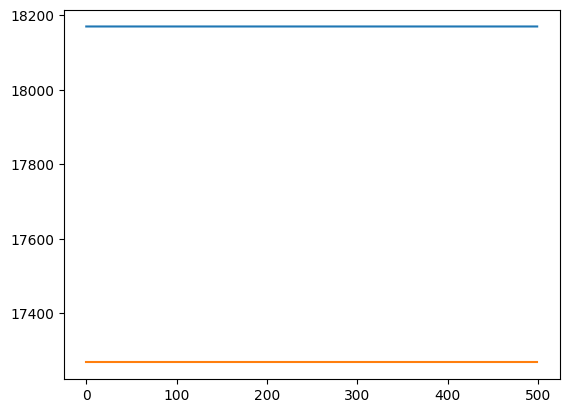

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.show()

In [ ]:
result=model.evaluate(X,y)

470/470 [==============================] - 1s 2ms/step - loss: 17989.7305 - mae: 133.1884 - mse: 17989.7305


Hyperparameter Tuning

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

scaler=MinMaxScaler()

In [ ]:
X_stadardized=scaler.fit_transform(X)
pd.DataFrame(X_stadardized)

,0,1,2,3,4,5,6,7,8,9
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [ ]:
pip install scikeras

In [ ]:
import scikeras
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=10,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
  return model

In [ ]:
model=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)


In [ ]:
grid_result=grid.fit(X_stadardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-54.435 total time=  42.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-164.062 total time=  21.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-66.296 total time=  21.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-76.561 total time=  21.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-68.522 total time=  23.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ...batch_size=10, epochs=50;, score=-54.435 total time= 2.4min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ..batch_size=10, epochs=50;, score=-164.062 total time= 1.7min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ...batch_size=10, epochs=50;, score=-66.296 total time= 1.7min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ...batch_size=10, epochs=50;, score=-76.561 total time= 1.6min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ...batch_size=10, epochs=50;, score=-68.522 total time= 1.7min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ..batch_size=10, epochs=100;, score=-54.435 total time= 3.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END .batch_size=10, epochs=100;, score=-164.062 total time= 3.3min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ..batch_size=10, epochs=100;, score=-66.296 total time= 3.3min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ..batch_size=10, epochs=100;, score=-76.561 total time= 3.3min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ..batch_size=10, epochs=100;, score=-68.522 total time= 3.3min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ...batch_size=20, epochs=10;, score=-54.435 total time=  11.3s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-164.062 total time=  11.4s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-66.296 total time=  11.3s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-76.561 total time=  11.4s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-68.522 total time=  10.7s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ...batch_size=20, epochs=50;, score=-54.435 total time= 1.4min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-164.062 total time=  53.3s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ...batch_size=20, epochs=50;, score=-66.296 total time=  52.7s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ...batch_size=20, epochs=50;, score=-76.561 total time=  53.2s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ...batch_size=20, epochs=50;, score=-68.522 total time=  52.8s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ..batch_size=20, epochs=100;, score=-54.435 total time= 2.4min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END .batch_size=20, epochs=100;, score=-164.062 total time= 2.4min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ..batch_size=20, epochs=100;, score=-66.296 total time= 1.7min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ..batch_size=20, epochs=100;, score=-76.561 total time= 2.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ..batch_size=20, epochs=100;, score=-68.522 total time= 2.4min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ...batch_size=40, epochs=10;, score=-54.435 total time=  11.2s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-164.062 total time=   6.3s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-66.296 total time=   6.3s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-76.561 total time=   6.3s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-68.522 total time=   5.7s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ...batch_size=40, epochs=50;, score=-54.435 total time=  25.6s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-164.062 total time=  42.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-66.296 total time=  42.2s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-76.561 total time=  41.9s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ...batch_size=40, epochs=50;, score=-68.522 total time=  25.6s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-54.435 total time=  50.6s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-164.062 total time= 1.4min
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ..batch_size=40, epochs=100;, score=-66.296 total time=  50.6s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ..batch_size=40, epochs=100;, score=-76.561 total time= 1.4min
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ..batch_size=40, epochs=100;, score=-68.522 total time=  49.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,std,params):
  print('{},() with:{}'.format(mean,stdev,param))

Best:-85.97527050092808,using:{'batch_size': 10, 'epochs': 50}
-85.97527062828657,() with:39.68087032397357
-85.97527050092808,() with:39.68087037978874
-85.97527050092808,() with:39.68087037978874
-85.975275283982,() with:39.680871689766256
-85.97527050093443,() with:39.68087037978595
-85.97527050093443,() with:39.68087037978595
-85.97530322639618,() with:39.680891590854365
-85.9752705266615,() with:39.680870385295435
-85.97527050093763,() with:39.680870379784544


In [ ]:
from keras.layers import Dropout

In [ ]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(10,input_dim=10,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
  return model

In [ ]:
model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=40,epochs=10,dropout_rate=0.0,learning_rate=0.1)
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)
grid1=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)


In [ ]:
grid_result=grid1.fit(X_stadardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-54.435 total time=   6.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-164.062 total time=  10.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-66.296 total time=  12.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-76.561 total time=  12.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-68.522 total time=   6.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-54.435 total time=   6.2s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-164.062 total time=   6.4s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-66.296 total time=   5.6s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-76.561 total time=  11.2s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-68.522 total time=   6.0s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-54.435 total time=   6.1s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-164.062 total time=   6.2s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-66.296 total time=   6.4s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-76.561 total time=   5.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-68.522 total time=   6.2s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-54.435 total time=   5.8s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-164.062 total time=   6.7s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-66.296 total time=   6.2s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-76.561 total time=   7.4s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-68.522 total time=   6.4s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-54.435 total time=   9.1s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-164.062 total time=   6.8s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-66.296 total time=   5.8s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-76.561 total time=  11.3s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-68.522 total time=   6.3s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-54.435 total time=   6.3s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-164.062 total time=   6.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-66.296 total time=   6.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-76.561 total time=  12.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-68.522 total time=  11.4s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-54.435 total time=   6.5s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-164.062 total time=   6.6s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-66.296 total time=  11.3s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-76.561 total time=   6.4s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-68.522 total time=  11.7s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-54.435 total time=   6.8s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-164.062 total time=   6.2s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-66.296 total time=  11.6s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-76.561 total time=   7.0s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-68.522 total time=   6.1s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-54.435 total time=  11.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-164.062 total time=  11.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-66.296 total time=   6.9s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-76.561 total time=   5.9s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-68.522 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,std,params):
  print('{},() with:{}'.format(mean,stdev,param))

Best:-85.97527050445572,using:{'dropout_rate': 0.2, 'learning_rate': 0.01}
-85.97530194497804,() with:39.68089090175851
-85.97530367612936,() with:39.68086874158651
-85.975303230757,() with:39.680883645057214
-85.97527146627549,() with:39.68087157490168
-85.97527140323795,() with:39.68086998822138
-85.97527167829101,() with:39.68087151946484
-85.97527050964882,() with:39.68087037660631
-85.97527050445572,() with:39.680870377454355
-85.97527059825943,() with:39.68087054848978


In [ ]:
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(10,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='mean_squard_error',optimizer='adam',metrics=['mse'])
  return model

In [ ]:
model=KerasRegressor(bulid_fn=create_model,verbose=0,batch_size=40,epochs=10,activation_function='softmax',init='uniform')
activation_function=['sofrmax','relu','tanh','linear']
init=['uniform','normal','zero']
param_grids=dict(activation_function=activation_function,init=init)
grid1=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(X_stadardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-54.435 total time=  22.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-164.062 total time=  22.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-66.296 total time=  21.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-76.561 total time=  22.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-68.522 total time=  20.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ...batch_size=10, epochs=50;, score=-54.435 total time= 2.4min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ..batch_size=10, epochs=50;, score=-164.062 total time= 2.4min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ...batch_size=10, epochs=50;, score=-66.296 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ...batch_size=10, epochs=50;, score=-76.561 total time= 1.7min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ...batch_size=10, epochs=50;, score=-68.522 total time= 1.7min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ..batch_size=10, epochs=100;, score=-54.435 total time= 4.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END .batch_size=10, epochs=100;, score=-164.062 total time= 4.4min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ..batch_size=10, epochs=100;, score=-66.296 total time= 3.4min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ..batch_size=10, epochs=100;, score=-76.561 total time= 4.4min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ..batch_size=10, epochs=100;, score=-68.522 total time= 3.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ...batch_size=20, epochs=10;, score=-54.435 total time=  11.5s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-164.062 total time=  11.4s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-66.296 total time=  11.4s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-76.561 total time=  11.4s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-68.522 total time=  11.3s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ...batch_size=20, epochs=50;, score=-54.435 total time= 1.4min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-164.062 total time=  51.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ...batch_size=20, epochs=50;, score=-66.296 total time= 1.4min
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ...batch_size=20, epochs=50;, score=-76.561 total time= 1.4min
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ...batch_size=20, epochs=50;, score=-68.522 total time=  50.1s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ..batch_size=20, epochs=100;, score=-54.435 total time= 2.4min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END .batch_size=20, epochs=100;, score=-164.062 total time= 1.7min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ..batch_size=20, epochs=100;, score=-66.296 total time= 1.7min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ..batch_size=20, epochs=100;, score=-76.561 total time= 2.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ..batch_size=20, epochs=100;, score=-68.522 total time= 1.7min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ...batch_size=40, epochs=10;, score=-54.435 total time=   5.9s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-164.062 total time=   6.1s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-66.296 total time=   6.1s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-76.561 total time=   6.1s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-68.522 total time=   5.5s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ...batch_size=40, epochs=50;, score=-54.435 total time=  25.5s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-164.062 total time=  25.7s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-66.296 total time=  42.3s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-76.561 total time=  25.8s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ...batch_size=40, epochs=50;, score=-68.522 total time=  41.9s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-54.435 total time=  50.7s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-164.062 total time= 1.4min
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ..batch_size=40, epochs=100;, score=-66.296 total time= 1.4min
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ..batch_size=40, epochs=100;, score=-76.561 total time=  53.0s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ..batch_size=40, epochs=100;, score=-68.522 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,std,params):
  print('{},() with:{}'.format(mean,stdev,param))

Best:-85.97527050093125,using:{'batch_size': 10, 'epochs': 50}
-85.9752705629889,() with:39.68087043618319
-85.97527050093125,() with:39.68087037978735
-85.97527050093125,() with:39.68087037978735
-85.97527553382858,() with:39.680871929745045
-85.97527050093761,() with:39.68087037978456
-85.97527050093443,() with:39.68087037978595
-85.97530971350301,() with:39.68087820333114
-85.97527052449618,() with:39.68087038387689
-85.97527050093761,() with:39.68087037978456


Numbers of neurons in Activation layers

In [ ]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
  return model

In [ ]:
model=KerasRegressor(bulid_fn=create_model,verbose=0,batch_size=40,epochs=10,neuron1=4,neuron2=2)
neuron1=[4,8,16]
neuron2=[2,4,8]
param_grids=dict(neuron1=neuron1,neuron2=neuron2)
grid1=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(X_stadardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-54.435 total time=  22.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-164.062 total time=  22.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-66.296 total time=  21.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-76.561 total time=  43.1s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-68.522 total time=  21.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ...batch_size=10, epochs=50;, score=-54.435 total time= 2.4min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ..batch_size=10, epochs=50;, score=-164.062 total time= 1.6min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ...batch_size=10, epochs=50;, score=-66.296 total time= 1.6min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ...batch_size=10, epochs=50;, score=-76.561 total time= 2.4min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ...batch_size=10, epochs=50;, score=-68.522 total time= 1.6min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ..batch_size=10, epochs=100;, score=-54.435 total time= 3.3min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END .batch_size=10, epochs=100;, score=-164.062 total time= 3.3min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ..batch_size=10, epochs=100;, score=-66.296 total time= 3.3min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ..batch_size=10, epochs=100;, score=-76.561 total time= 3.2min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ..batch_size=10, epochs=100;, score=-68.522 total time= 3.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ...batch_size=20, epochs=10;, score=-54.435 total time=  11.3s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-164.062 total time=  11.4s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-66.296 total time=  11.3s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-76.561 total time=  11.4s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-68.522 total time=  11.3s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ...batch_size=20, epochs=50;, score=-54.435 total time= 1.4min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-164.062 total time= 1.4min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ...batch_size=20, epochs=50;, score=-66.296 total time=  50.6s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ...batch_size=20, epochs=50;, score=-76.561 total time=  50.2s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ...batch_size=20, epochs=50;, score=-68.522 total time=  51.6s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ..batch_size=20, epochs=100;, score=-54.435 total time= 1.6min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END .batch_size=20, epochs=100;, score=-164.062 total time= 2.4min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ..batch_size=20, epochs=100;, score=-66.296 total time= 1.6min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ..batch_size=20, epochs=100;, score=-76.561 total time= 2.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ..batch_size=20, epochs=100;, score=-68.522 total time= 2.4min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ...batch_size=40, epochs=10;, score=-54.435 total time=   6.1s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-164.062 total time=  11.2s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-66.296 total time=  11.2s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-76.561 total time=  12.6s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-68.522 total time=  11.4s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ...batch_size=40, epochs=50;, score=-54.435 total time=  26.9s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-164.062 total time=  42.2s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-66.296 total time=  26.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-76.561 total time=  26.5s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ...batch_size=40, epochs=50;, score=-68.522 total time=  25.7s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-54.435 total time=  50.8s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-164.062 total time=  51.7s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ..batch_size=40, epochs=100;, score=-66.296 total time= 1.4min
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ..batch_size=40, epochs=100;, score=-76.561 total time=  49.8s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ..batch_size=40, epochs=100;, score=-68.522 total time=  50.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,std,params):
  print('{},() with:{}'.format(mean,stdev,param))

Best:-85.97527050093443,using:{'batch_size': 10, 'epochs': 50}
-85.97527066530105,() with:39.6808703686436
-85.97527050093443,() with:39.68087037978595
-85.97527050093443,() with:39.68087037978595
-85.97527620981222,() with:39.680871709077294
-85.97527050093761,() with:39.68087037978456
-85.97527050093761,() with:39.68087037978456
-85.97530327627949,() with:39.680881614961734
-85.97527053040919,() with:39.6808703659553
-85.97527050094077,() with:39.68087037978316
